In [1]:
import tensorflow
from tensorflow import keras
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()


Dados do dataset

---



In [ ]:
print(identificacoes_treino.min(), identificacoes_treino.max())

0 9


Visualizar Imagens

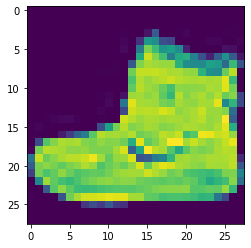

In [2]:
import matplotlib.pyplot as plt
plt.imshow(imagens_treino[0])

Mostrar identificação da imagens

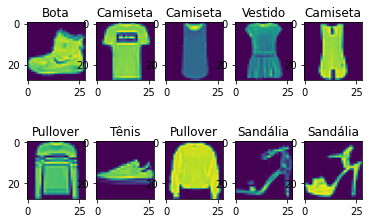

In [3]:
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']
for imagem in range(10):
  plt.subplot(2, 5, imagem + 1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

Criando o modelo

In [4]:
#Diminuir perda com graduação entre 0 e 1 (Normalização)
imagens_treino = imagens_treino / 255.0
modelo = keras.Sequential([
                           # Achatamento para uma única dimensão (Camada 0)
                           keras.layers.Flatten(input_shape=(28,28)),

                           # Camada densa, interessante sempre colocar múltiplo de 2 (Camada 1)
                           keras.layers.Dense(256, activation=tensorflow.nn.relu),

                           keras.layers.Dropout(0.2),

                           # Capta mais que somente o contorno
                           #keras.layers.Dense(128, activation=tensorflow.nn.relu),

                           # Capta mais que somente o contorno
                           #keras.layers.Dense(64, activation=tensorflow.nn.relu),

                           #Saída (Camada 2)
                           keras.layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])

modelo.compile(optimizer='adam',
 #Entropia categorica cruzada esparsa
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5278 - accuracy: 0.8122 - val_loss: 0.4166 - val_accuracy: 0.8468
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4034 - accuracy: 0.8531 - val_loss: 0.3794 - val_accuracy: 0.8583
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3627 - accuracy: 0.8669 - val_loss: 0.3570 - val_accuracy: 0.8685
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3415 - accuracy: 0.8744 - val_loss: 0.3579 - val_accuracy: 0.8686
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3222 - accuracy: 0.8802 - val_loss: 0.3409 - val_accuracy: 0.8792


Salvar o modelo para futuro load

In [8]:
from tensorflow.keras.models import load_model

nome_arquivo = 'modelo.h5'
modelo.save(nome_arquivo)
modelo_salvo = load_model(nome_arquivo)

Analise de melhoria da acurácia do treino

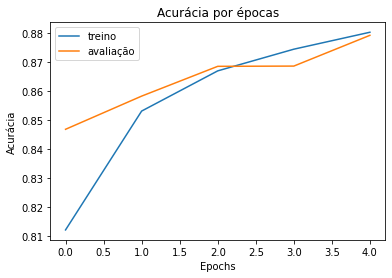

In [5]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Epochs')
plt.ylabel('Acurácia')
plt.yscale('linear')
plt.legend(['treino', 'avaliação'])

Perda de treino

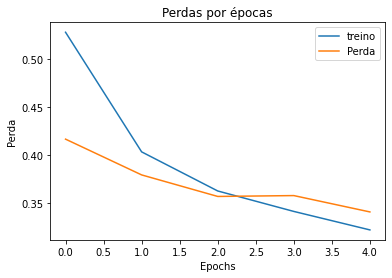

In [6]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por épocas')
plt.xlabel('Epochs')
plt.ylabel('Perda')
plt.yscale('linear')
plt.legend(['treino', 'Perda'])

Testes

In [10]:
import numpy as np
testes = modelo.predict(imagens_teste)
print('Resultado do teste: ' , np.argmax(testes[1]))
print('número de imagens: ', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado do testes do modelo salvo: ', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste: ', identificacoes_teste[1])

Resultado do teste:  2
número de imagens:  2
resultado do testes do modelo salvo:  2
número da imagem de teste:  2


Validação

In [10]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda teste: ' , perda_teste)
print('Acuracia do teste: ', acuracia_teste)

313/313 [==============================] - 0s 1ms/step - loss: 53.3036 - accuracy: 0.8692
Perda teste:  53.30358123779297
Acuracia do teste:  0.8691999912261963
